1. #### MCAR - Missing Completely at Random
The probability of being missing is the same for all the observations. Also, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.

2. #### MNAR - Missing Data Not at Random: Systematic missing values.
There is absolutely some relationships between the data missing and any other values, observed or missing, within the dataset.

3. #### MAR - Missing at Random 
i.e Men -- hide their salary
    Women -- hid their age

In [1]:
import pandas as pd

In [17]:
df=pd.read_csv('./titanic/train.csv')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.isnull().sum()

## Age and Cabin are NOT MCAR

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df[df['Embarked'].isnull()]

## This 2 rows of value are MCAR value
## Therefore, they are MNAR

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [23]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

## Find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [26]:
df.groupby(['Survived'])['cabin_null'].mean()

## for people who not survive has 0.8 of missing value
## for people who survive has 0.6 of missing value

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Techniques of handling missing values

1. Mean/ Median/ Mode replacement
2. Random Sample Imputation
3. Capturing NaN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#### 1. Mean/ Median/ Mode imputation 
When should we apply?
This technique has the assumption that the data are missing completely at random (MCAR).

To solve this by replacing the NaN with the most frequent occurance of the variables.

In [27]:
df=pd.read_csv('./titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
def impute_NaN(df, variable, median):
    df[variable+'_median']=df[variable].fillna(median)

In [30]:
median=df.Age.median()

In [31]:
median

28.0

In [32]:
impute_NaN(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [33]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [34]:
df.describe()

,Survived,Age,Fare,Age_median
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,29.361582
std,0.486592,14.526497,49.693429,13.019697
min,0.000000,0.420000,0.000000,0.420000
25%,0.000000,20.125000,7.910400,22.000000
50%,0.000000,28.000000,14.454200,28.000000
75%,1.000000,38.000000,31.000000,35.000000
max,1.000000,80.000000,512.329200,80.000000


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

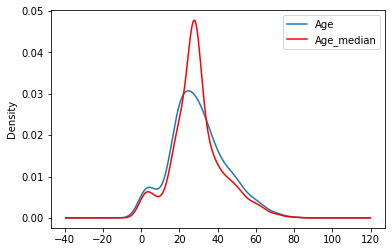

In [40]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax, color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages and Disadvantages of Mean/Median Imputation
#### Advantages
1. Easy to implement (Robust to outliers -- median)
2. A faster way to obtain the complete dataset

#### Disadvantages
1. Change or distortion in the orignal variance
2. Impact correlation

#### 2. Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the NaN values

When to us: It assumes that the data are missing completely at random (MCAR)

In [2]:
df=pd.read_csv('./titanic/train.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [20]:
### .sample() pick a random sample 
### .dropna() if inplace=True, only assign NaN data back 
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

470    True
Name: Age, dtype: bool

In [21]:
def impute_NaN2(df, variable, median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    ## It will have the random sample to fill the NaN
    random_sample=df[variable].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    ## pandas need to have same index to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [22]:
median=df.Age.median() 

In [23]:
median

28.0

In [24]:
impute_NaN2(df,'Age',median)

In [25]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


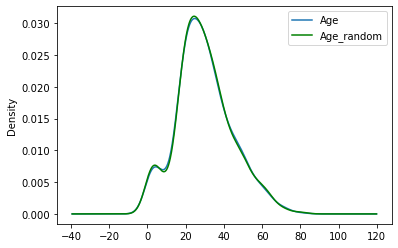

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax, color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Observation: There we have a complete dataset, while the graphic is same with the orignal's

#### Advantage and Disadvantages of Random Sample Imputation
Advantage
1. Easy to implement 
2. There is less distortion in variance

Disvantage 
1. Randomness might not work for every situation

#### 3. Capturing NaN values with a new feature

It works well if the data are not missing completly at random 

In [28]:
df=pd.read_csv('./titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
import numpy as np
df['Age_NaN']=np.where(df['Age'].isnull(),1,0)

In [33]:
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [34]:
### inplace=True, dataset will change permenantly 
df['Age'].fillna(df.Age.median(),inplace=True)

In [36]:
df.head(20)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantage and Disadvantages of Capturing NaN values with a new feature
##### Advantages 
1. Easy to implement
2. Captures the importance of missing value by providing new feature to record it 

##### Disadvantages
1. Creating additional Features (Curse of Dimensionality)

### 4. End of Distribution imputation

Replacing all the missing value with the values out of 3*std 

Works well if the data are not missing completely at random

In [37]:
df=pd.read_csv('./titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

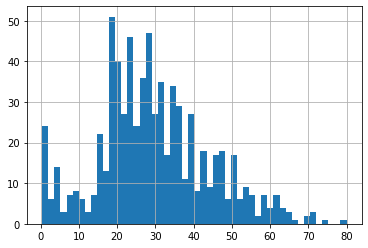

In [38]:
df.Age.hist(bins=50)

In [43]:
extreme=df.Age.mean()+3*df.Age.std()

/Users/graceyu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

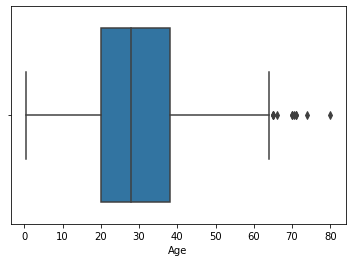

In [42]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [46]:
## in order to compare the value replace by median and value with end_distribution
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [47]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [49]:
df.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

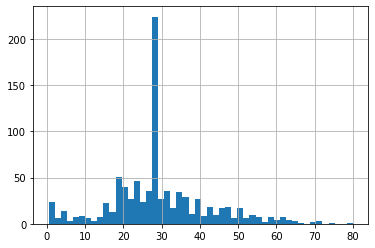

In [50]:
df['Age'].hist(bins=50)

<AxesSubplot:>

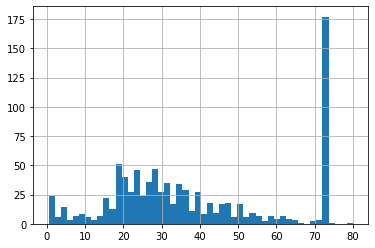

In [51]:
df['Age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

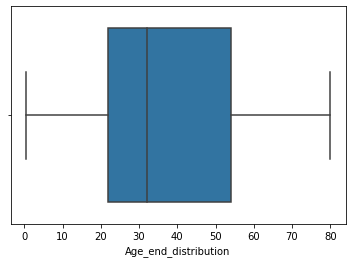

In [55]:
sns.boxplot('Age_end_distribution',data=df)

Observation: It replace the Nan values and capture the outliers.

#### Advantage and Disadvantage -- End of Distribution imputation
##### Advantage 
1. Easy to implement 
2. Captures the importance of missingness if there is one

##### Disadvantage 
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution 
3. If the number of NaN is big, it will mask true outliers in the distribution
4. If the number of NaN is small, the replaced NaN may be considered an outlier and pre-processed in a subsequent step of feature engineering.